In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

def collect_losses(root_dir):
    depth=3

    results = dict()
    
    results["en"] = defaultdict(int)
    results["it"] = defaultdict(int)

    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) == depth:
            for file_ in files:
                if file_ == "all_results.json":
                    
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)

                    names = subdir.split(os.sep)
                    seed = names[-2]
                    mode = names[-3]
                    lang = names[-1].split("_")[-1]

                    # print(f"{mode} - {lang} | MSE {d['eval_mse']} - R2 {d['eval_r2']} (seed : {seed})")

                    results[lang][f"{mode}_MSE"] += d['eval_mse']
                    results[lang][f"{mode}_R2"] += d['eval_r2']

    return results

In [3]:
def plot_comp_res(results):    
    plt.rcParams["figure.figsize"] = (10,5)

    r2s = dict()
    mses = dict()
    

    for k, v in results.items():
        key_splitted = k.split("_")
        if "MSE" in key_splitted:
            mses["_".join(key_splitted[:-1])] = v
        else:
            r2s["_".join(key_splitted[:-1])] = v
    
    
    print("MSE s")
    
    for k, v in mses.items():
        plt.scatter(0, v, label=k)
        
    plt.ylabel("MSE")
    plt.legend()
    plt.show()
    
    
    print("R2 s")

    for k, v in r2s.items():
        plt.scatter(0, v, label=k)

    plt.ylabel("R2")
    plt.legend()
    plt.show()


In [4]:
results = collect_losses("finetuning_comp")

MSE s


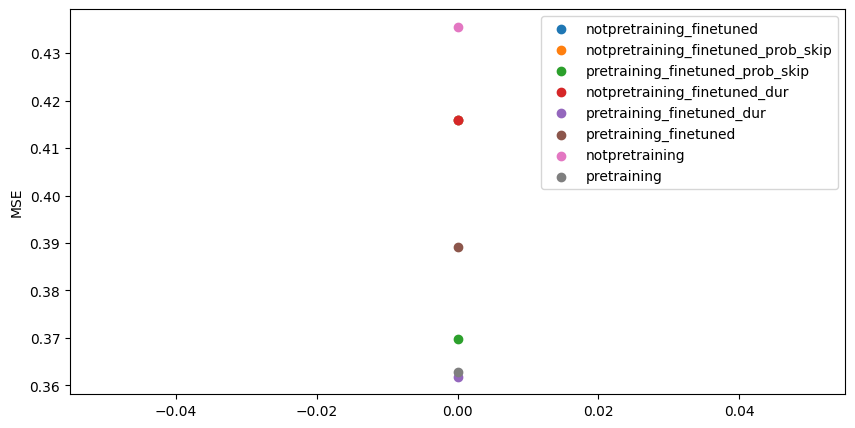

R2 s


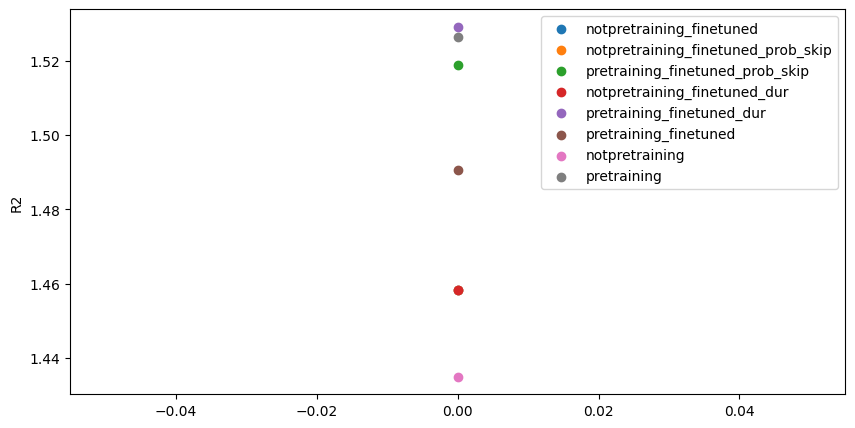

In [5]:
plot_comp_res(results["en"])

MSE s


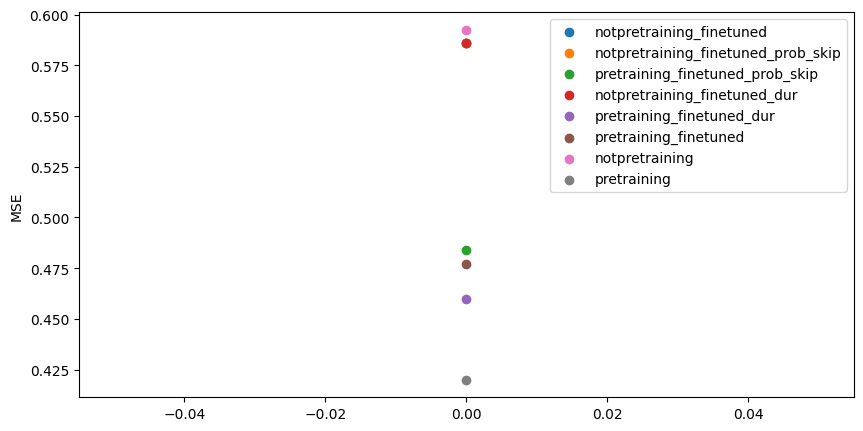

R2 s


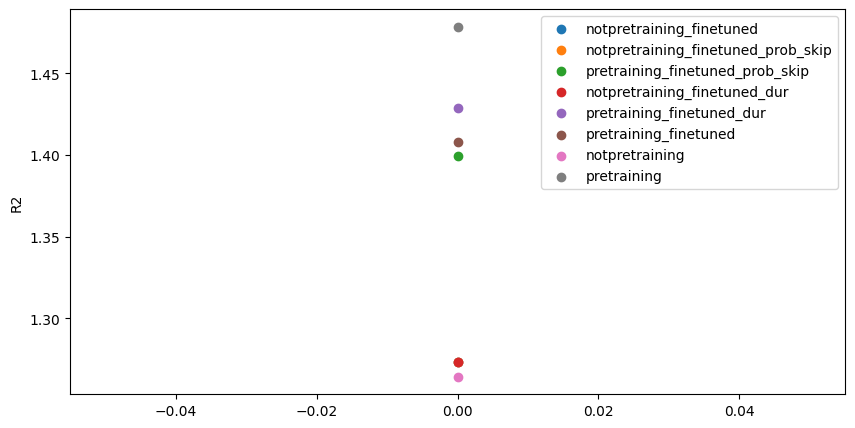

In [6]:
plot_comp_res(results["it"])

In [7]:
results2 = collect_losses("finetuning_comp2")

MSE s


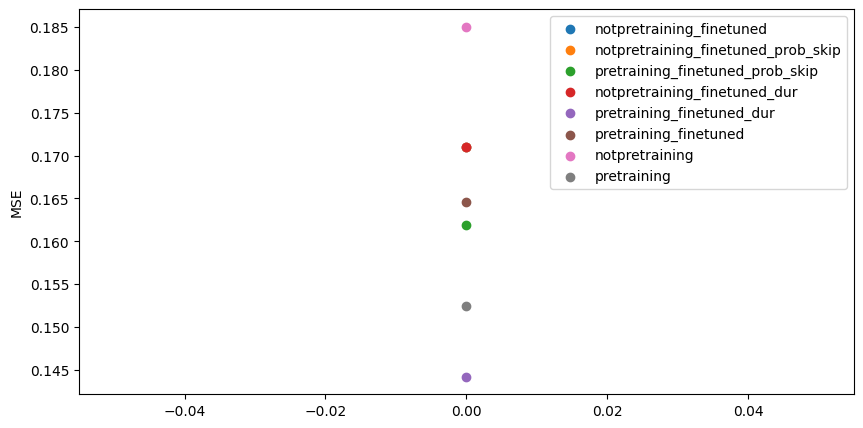

R2 s


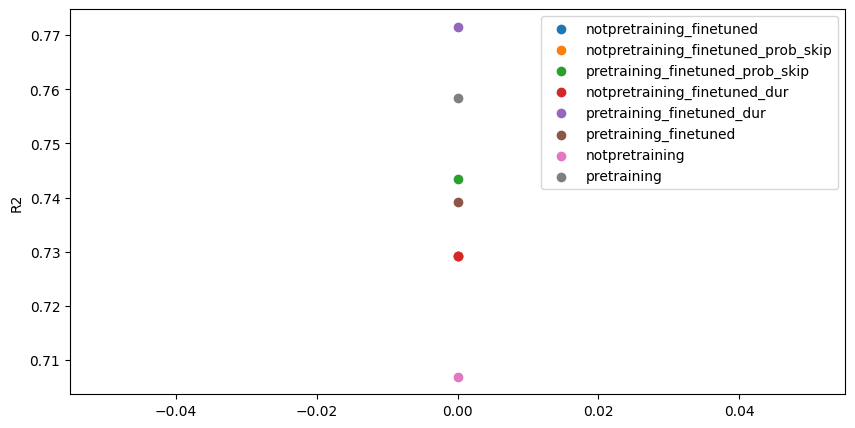

In [8]:
plot_comp_res(results2["en"])

MSE s


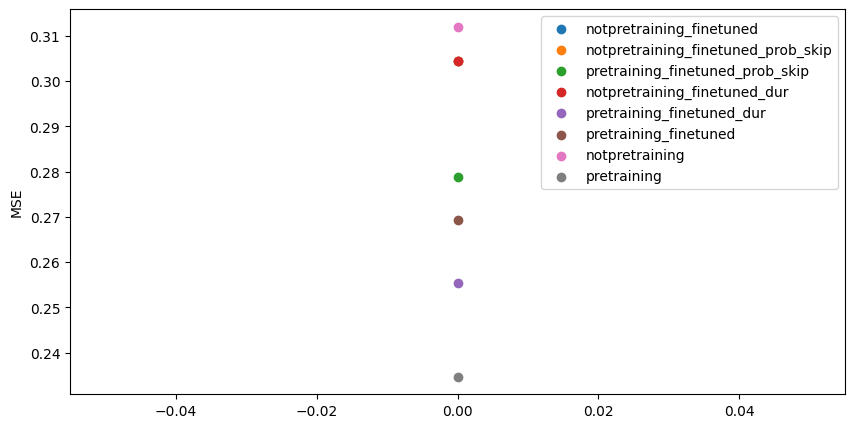

R2 s


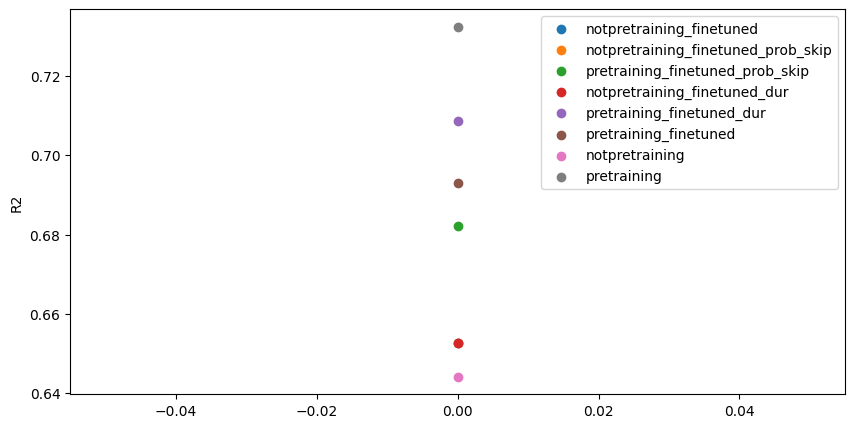

In [9]:
plot_comp_res(results2["it"])